<a href="https://colab.research.google.com/github/allenwang0713/tebaml0315/blob/main/minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


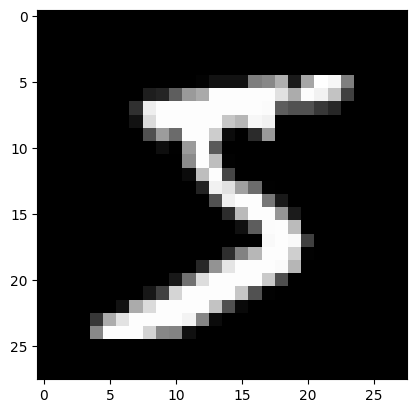

In [3]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

激活函式的選擇很重要
輸出層: 看狀況
中間層: relu family(m=1)

In [4]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    Dense(128, activation="relu", input_dim=784),
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


$ p_i = 正確答案 $

$ q_i = 預測值 $

$ categoricalcrossentropy(標準ce) = \sum p_ilog\frac 1q_i  $

如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy

因為你輸出的q -> q: 1這種東西 (1-q): 另外一種東西

$ binarycrossentropy = plog\frac 1q+(1-p)log\frac11-q $

In [5]:
model.compile(loss="mse", metrics=["accuracy"])

In [6]:
# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784)
x_test_norm = x_test.reshape(-1, 784)
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [8]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 4s 7ms/step - loss: 0.0904 - accuracy: 0.2087 - val_loss: 0.0776 - val_accuracy: 0.2747
Epoch 2/40
540/540 [==============================] - 3s 5ms/step - loss: 0.0767 - accuracy: 0.3031 - val_loss: 0.0748 - val_accuracy: 0.3113
Epoch 3/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.3140 - val_loss: 0.0719 - val_accuracy: 0.3112
Epoch 4/40
540/540 [==============================] - 3s 5ms/step - loss: 0.0721 - accuracy: 0.3224 - val_loss: 0.0704 - val_accuracy: 0.3302
Epoch 5/40
540/540 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.3282 - val_loss: 0.0687 - val_accuracy: 0.3400
Epoch 6/40
540/540 [==============================] - 4s 7ms/step - loss: 0.0704 - accuracy: 0.3360 - val_loss: 0.0715 - val_accuracy: 0.3227
Epoch 7/40
540/540 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.3407 - val_loss: 0.0689 - val_accuracy: 0.3375
Epoch 

In [9]:
# import math
# cases = [
#     (0.9999, 0.0001),
#     (0.5, 0.5),
#     (0.0001, 0.9999),
#     (0.6, 0.4)
# ]
# for q1, q2 in cases:
#     ce = 0.6 * math.log(1/q1, 2) + 0.4 * math.log(1/q2, 2)
#     print(q1, q2, "->", ce)